In [1]:
import os

os.chdir("..")

print(os.getcwd())

c:\Users\mquick\Documents\zeitgeist blog\projects


In [2]:
import pandas as pd
from words_deeds.types.democracy_indices import electoral, liberal, egalitarian
from words_deeds.utils import get_exec_suffixes, assign_dem_score, assign_exec_score, all_zero

In [32]:
constitute = pd.read_csv("./words_deeds/data/constitute.csv", on_bad_lines="skip")

C:\Users\mquick\AppData\Local\Temp\ipykernel_45300\2859594967.py:1: DtypeWarning: Columns (20,23,24,26,27,30,32,33,35,36,38,39,42,44,45,47,48,51,53,54,56,57,59,60,62,63,64,65,67,68,69,71,72,74,75,77,78,81,83,84,86,89,90,92,93,95,96,98,99,102,104,105,107,108,110,111,113,114,116,117,119,120,122,123,125,126,128,129,131,132,134,135,148,160,161,163,164,166,167,169,170,172,173,175,176,178,179,181,182,184,185,187,188,190,191,192,193,194,196,197,199,200,218,219,228,229,242,243,257,258,263,264,266,267,269,270,272,273,275,276,278,279,281,282,284,285,286,287,288,290,291,293,294,296,297,312,313,315,316,325,326,339,340,352,353,355,356,358,359,361,362,364,365,367,368,370,371,373,374,376,377,379,380,391,392,403,404,407,416,417,428,429,431,432,445,447,448,450,451,464,465,467,468,479,480,491,492,493,494,495,497,498,500,501,514,515,518,521,534,544,545,547,548,557,558,560,561,563,564,566,567,569,570,572,573,574,575,578,579,586,587,589,590,592,593,595,596,612,613,615,616,618,619,627,628,629,630,631,633,63

In [33]:
index_cols = ["cowcode", "country", "year"]

#### Electoral democracy

In [34]:
electoral_df = constitute[index_cols+[indicator.name for indicator in electoral.indicators]].copy()

In [35]:
for indicator in electoral.indicators:
    electoral_df[indicator.name] = electoral_df.apply(lambda x: assign_dem_score(x[indicator.name], indicator), axis=1)

In [36]:
exec_indicators = get_exec_suffixes(electoral_df.columns)

In [37]:
for indicator in exec_indicators:
    electoral_df[f"exec_{indicator}"] = electoral_df.apply(lambda x: assign_exec_score(x, indicator), axis=1)
    electoral_df.drop([f"hos{indicator}", f"hog{indicator}"], axis=1, inplace=True)

In [38]:
electoral_indicators_final = electoral_df.columns[3:]
electoral_df["words"] = electoral_df[electoral_indicators_final].sum(axis=1)
electoral_df["words"] = electoral_df["words"] / len(electoral_indicators_final)

<Axes: xlabel='year'>

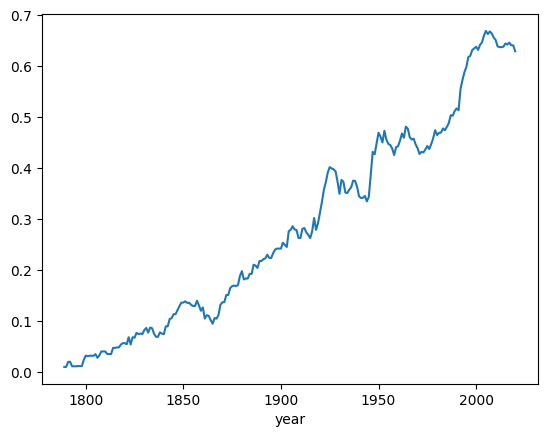

In [10]:
electoral_df\
    .groupby(["year"])["words"].mean()\
    .plot.line()

#### Liberal democracy

In [39]:
liberal_df = constitute[index_cols+[indicator.name for indicator in liberal.indicators]].copy()

In [40]:
for indicator in liberal.indicators:
    liberal_df[indicator.name] = liberal_df.apply(lambda x: assign_dem_score(x[indicator.name], indicator), axis=1)

In [41]:
exec_indicators = get_exec_suffixes(liberal_df.columns)

In [42]:
for indicator in exec_indicators:
    liberal_df[f"exec_{indicator}"] = liberal_df.apply(lambda x: assign_exec_score(x, indicator), axis=1)
    liberal_df.drop([f"hos{indicator}", f"hog{indicator}"], axis=1, inplace=True)

In [43]:
liberal_indicators_final = liberal_df.columns[3:]
liberal_df["words"] = liberal_df[liberal_indicators_final].sum(axis=1)
liberal_df["words"] = liberal_df["words"] / len(liberal_indicators_final)

<Axes: xlabel='year'>

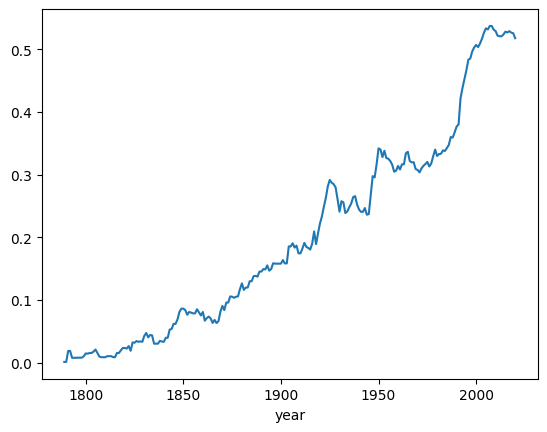

In [16]:
liberal_df\
    .groupby(["year"])["words"].mean()\
    .plot.line()

#### Egalitarian

In [44]:
egalitarian_df = constitute[index_cols+[indicator.name for indicator in egalitarian.indicators]].copy()

In [45]:
for indicator in egalitarian.indicators:
    egalitarian_df[indicator.name] = egalitarian_df.apply(lambda x: assign_dem_score(x[indicator.name], indicator), axis=1)

In [46]:
egalitarian_indicators_final = egalitarian_df.columns[3:]
egalitarian_df["words"] = egalitarian_df[egalitarian_indicators_final].sum(axis=1)
egalitarian_df["words"] = egalitarian_df["words"] / len(egalitarian_indicators_final)

<Axes: xlabel='year'>

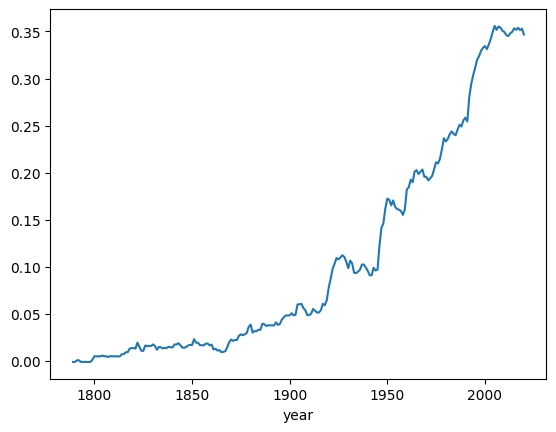

In [20]:
egalitarian_df\
    .groupby(["year"])["words"].mean()\
    .plot.line()

#### Merge datasets

In [47]:
words_dataframes = []
dem_types = ["electoral", "liberal", "egalitarian"]
dataframes = [electoral_df, liberal_df, egalitarian_df]
indicators = [electoral_indicators_final, liberal_indicators_final, egalitarian_indicators_final]

for dem_type, df, dem_indicators in zip(dem_types, dataframes, indicators):
    df = df[~df[dem_indicators].apply(all_zero, axis=1)]
    df["dem_type"] = dem_type
    words_dataframes.append(df)
    
words_df = pd.concat(words_dataframes)

C:\Users\mquick\AppData\Local\Temp\ipykernel_45300\1468000022.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dem_type"] = dem_type
C:\Users\mquick\AppData\Local\Temp\ipykernel_45300\1468000022.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dem_type"] = dem_type
C:\Users\mquick\AppData\Local\Temp\ipykernel_45300\1468000022.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [48]:
words_df = words_df[["cowcode", "country", "year", "dem_type", "words"]]\
    .pivot_table(index=index_cols, columns="dem_type", values="words")\
    .reset_index()\
    .rename_axis(None, axis=1)

In [49]:
country_cow_codes = words_df[["cowcode", "country"]].drop_duplicates()

In [50]:
index_cols = ["cowcode", "year"]
year_col = words_df["year"]
years = [year for year in range(min(year_col), max(year_col) + 1)]
countries = words_df["cowcode"].unique()
multiindex = pd.MultiIndex.from_product([countries, years], names=index_cols)

In [51]:
words_df.drop("country", axis=1, inplace=True)

In [52]:
words_df = words_df.set_index(index_cols).reindex(multiindex).reset_index()

In [57]:
words_df = words_df.groupby("cowcode").apply(lambda group: group.fillna(method='ffill')).reset_index(drop=True)

C:\Users\mquick\AppData\Local\Temp\ipykernel_45300\2669572828.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  words_df = words_df.groupby("cowcode").apply(lambda group: group.fillna(method='ffill')).reset_index(drop=True)
C:\Users\mquick\AppData\Local\Temp\ipykernel_45300\2669572828.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  words_df = words_df.groupby("cowcode").apply(lambda group: group.fillna(method='ffill')).reset_index(drop=True)


In [58]:
words_df = words_df.merge(country_cow_codes, on="cowcode", how="outer")

In [59]:
words_df["words_total"] = words_df[dem_types].mean(axis=1)

<Axes: xlabel='year'>

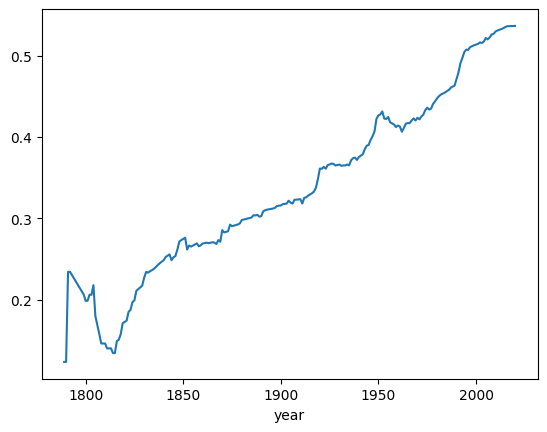

In [28]:
words_df\
    .groupby(["year"])["words_total"].mean()\
    .plot.line()

In [60]:
words_df.to_csv("./words_deeds/data/words_scores.csv", index=False)